In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib widget
import os
import sys
import importlib
import glob
from scipy.signal import find_peaks


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import tools
import bode_tools
import DREAM_colors as dc
import math_functions as mf
import BodeClass_PSI as bc
import ExperimentClass as ec

importlib.reload(tools)
importlib.reload(mf)
importlib.reload(bc)
importlib.reload(ec)
importlib.reload(dc)


<module 'DREAM_colors' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\DREAM_colors.py'>

In [2]:
record_list = ["P128s"]

name = "20241010_steady_state_Ek"

light_osci = "$E_k$ ± 0.25$E_k$"

exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')

fig_folder = exp.path + "/figures/"
if not os.path.exists(fig_folder):
    os.makedirs(fig_folder)



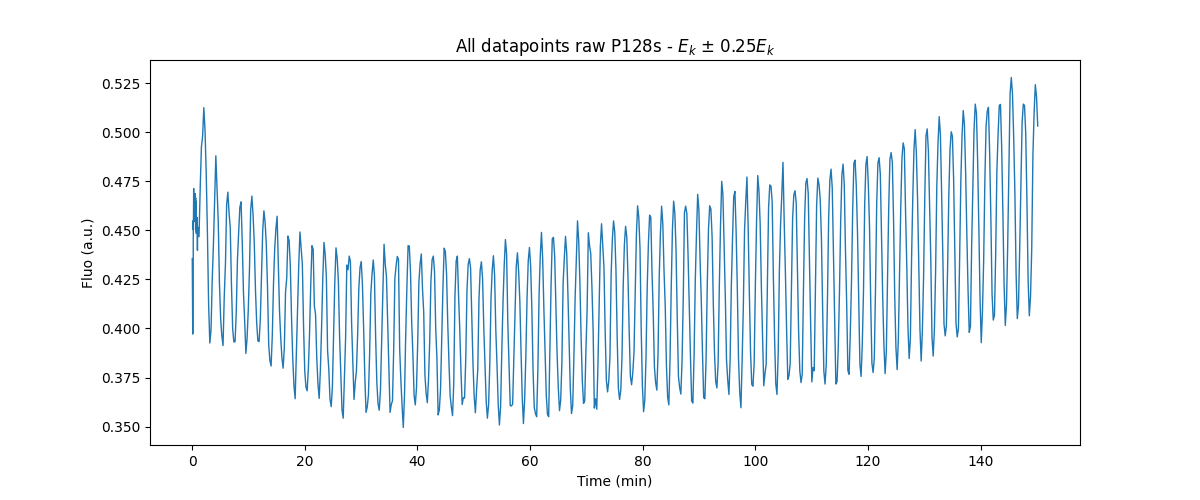

In [3]:
for record in record_list:
    fig, ax = plt.subplots(figsize=(12, 5))
    index = exp.records.index(record)
    ax.plot(exp.clean_times[index][1:-1]/60, exp.clean_data[index][1:-1], '-', markersize=2, linewidth=1) 
    ax.set_title(f"All datapoints raw {record} - {light_osci}")
    ax.set_xlabel("Time (min)")
    ax.set_ylabel("Fluo (a.u.)")
    fig.savefig(fig_folder + f"All datapoints raw {record} - {light_osci}.png", dpi=300)

In [4]:
index = exp.records.index("P128s")
start = tools.closest_index(exp.clean_times[index], 60)
time = exp.clean_times[index][start:-1]
data = exp.clean_data[index][start:-1]



In [5]:
dspline = 100
order = 2

detrended_data, fit = bode_tools.spline_detrending(data, order = order, dspline = dspline)


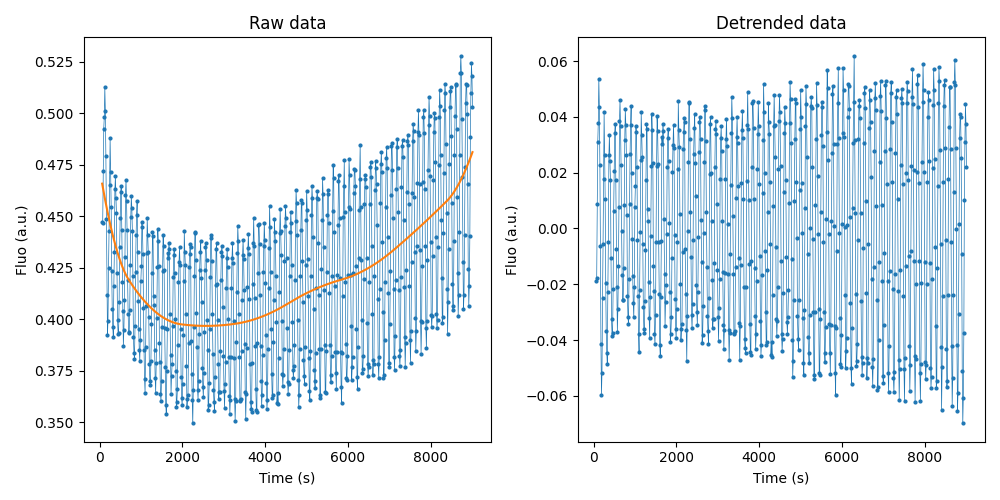

In [6]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(time, data, '-o', markersize=2, linewidth = 0.5)
ax[0].plot(time, fit)
ax[0].set_title(f"Raw data")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Fluo (a.u.)")
ax[1].plot(time, detrended_data, '-o', markersize=2, linewidth = 0.5)
ax[1].set_title("Detrended data")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Fluo (a.u.)")
fig.tight_layout()

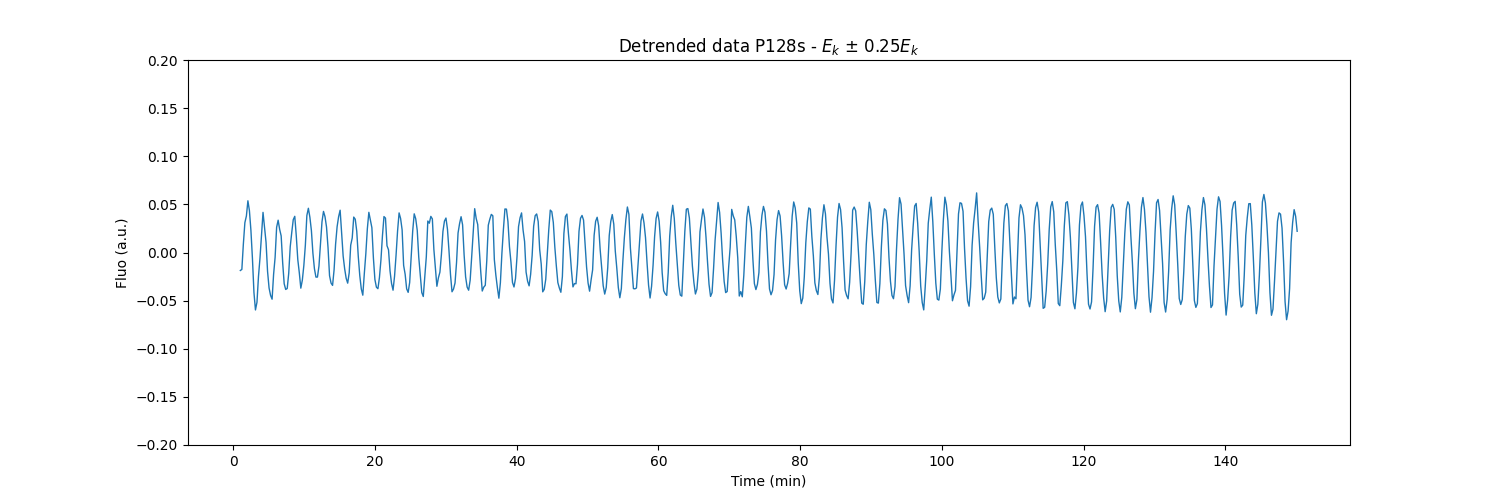

In [7]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(time/60, detrended_data, '-', linewidth = 1)
ax.set_title(f"Detrended data {record} - {light_osci}")
ax.set_xlabel("Time (min)")
ax.set_ylabel("Fluo (a.u.)")
ax.set_ylim(-0.2, 0.2)
fig.savefig(fig_folder + f"Detrended data {record} - {light_osci}.png", dpi=300)


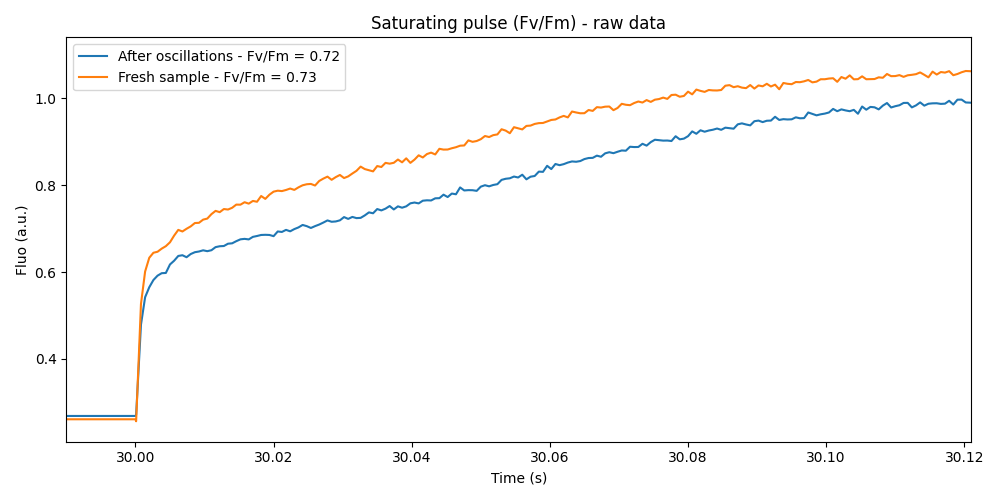

In [8]:
Phi_PSII_record = ["AL0", "AL0_fresh"]
labels = ["After oscillations", "Fresh sample"]
fig, ax = plt.subplots(figsize = (10,5))
Phi_0 = []
for i, rec in enumerate(Phi_PSII_record):
    index = exp.records.index(rec)
    F0 = np.mean(exp.clean_data[index][0:tools.closest_index(exp.clean_times[index], 9.8)])
    FM = np.mean(exp.clean_data[index][tools.closest_index(exp.clean_times[index], 30.1):tools.closest_index(exp.clean_times[index], 30.12)])
    Phi_0.append((FM - F0)/FM)
    ax.plot(exp.clean_times[index], exp.clean_data[index], '-', label = labels[i] + f" - Fv/Fm = {Phi_0[i]:.2f}")
    

ax.set_title("Saturating pulse (Fv/Fm) - raw data")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Fluo (a.u.)")
ax.set_xlim(29.99, 30.121)
ax.legend()

fig.tight_layout()
fig.savefig(fig_folder + "Saturating pulse (Fv_Fm) - raw data.png", dpi=300)


In [23]:
dsplines = [100, 100, 10]
order = 2

names = ["20241008_steady_state_0.5Ek", "20241010_steady_state_Ek", "20241004_steady_state",]

experiments = []
time = []
data = []
detrended_data = []

Phi_PSII_record = ["AL0_fresh", "AL0"]
Phi_0 = []

for i, name in enumerate(names):
    exp = ec.Experiment(name, "PSI", DataType = ".csv", sep = ';')
    index = exp.records.index("P128s")
    start = tools.closest_index(exp.clean_times[index], 60)
    time.append(exp.clean_times[index][start:-1])
    data.append(exp.clean_data[index][start:-1])
    aux, _ = bode_tools.spline_detrending(data[-1], order = order, dspline = dsplines[i])
    detrended_data.append(aux)
    experiments.append(exp)
    aux_phi = []
    for i, rec in enumerate(Phi_PSII_record):
        index = exp.records.index(rec)
        F0 = np.mean(exp.clean_data[index][0:tools.closest_index(exp.clean_times[index], 9.8)])
        FM = np.mean(exp.clean_data[index][tools.closest_index(exp.clean_times[index], 30.1):tools.closest_index(exp.clean_times[index], 30.12)])
        aux_phi.append((FM - F0)/FM)
    Phi_0.append(aux_phi)



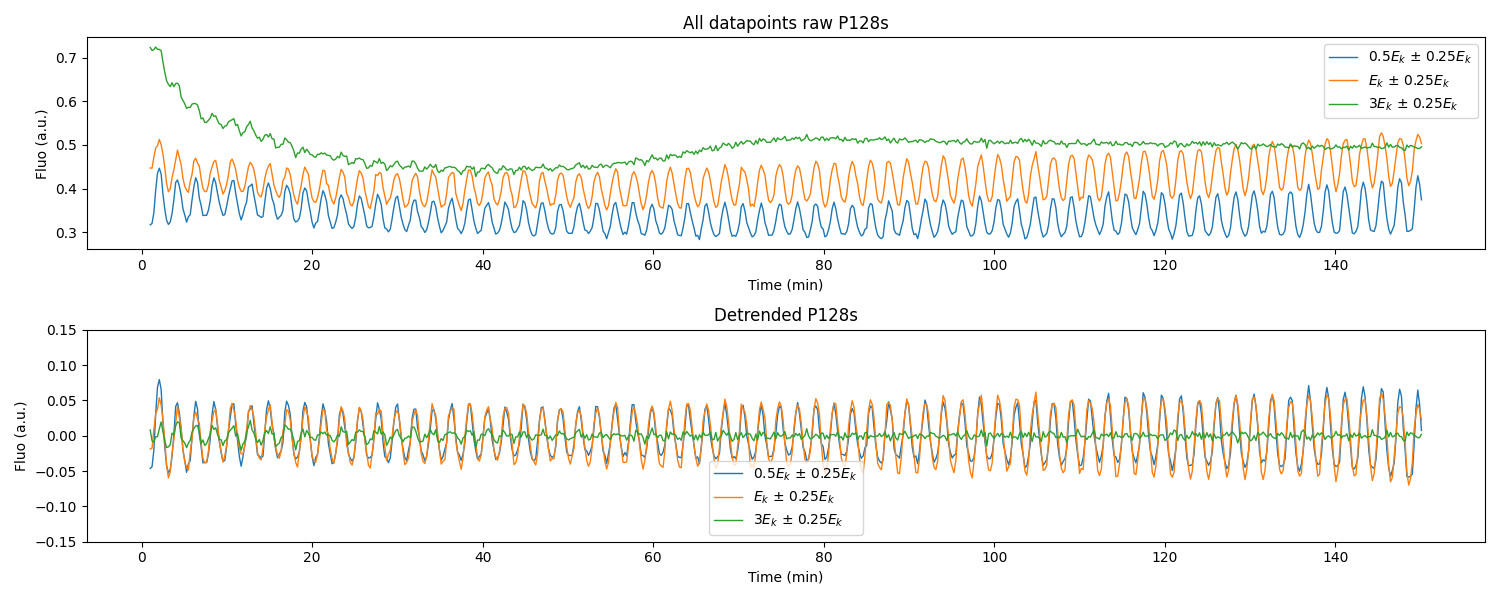

In [24]:
fig, ax = plt.subplots(2,1, figsize=(15, 6))
labels = ["0.5$E_k$ ± 0.25$E_k$", "$E_k$ ± 0.25$E_k$", "3$E_k$ ± 0.25$E_k$"]

for i in range(len(names)):
    ax[0].plot(time[i]/60, data[i], '-', markersize=2, linewidth=1, label = labels[i])
    ax[1].plot(time[i]/60, detrended_data[i], '-', markersize=2, linewidth=1, label = labels[i])
    
ax[0].set_title(f"All datapoints raw {record}")
ax[0].set_xlabel("Time (min)")
ax[0].set_ylabel("Fluo (a.u.)")
ax[0].legend()

ax[1].set_title(f"Detrended {record}")
ax[1].set_xlabel("Time (min)")
ax[1].set_ylabel("Fluo (a.u.)")
ax[1].legend()
ax[1].set_ylim(-0.15, 0.15)

fig.tight_layout()
fig.savefig(fig_folder + f"Compare.png", dpi=300)

In [18]:
Phi_0

[[0.7520779423990087, 0.4117391313039578],
 [0.7351423866414932, 0.7670921631890746],
 [0.7271456146170109, 0.7238851456791152]]

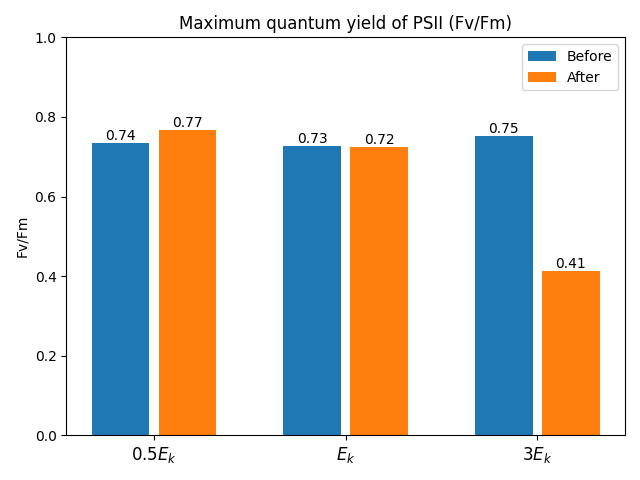

In [37]:
# Number of conditions (rows) and number of groups per condition (columns)
conditions = ["0.5$E_k$", "$E_k$", "3$E_k$"]
group_labels = ['Before', 'After']

# Setting up the plot
fig, ax = plt.subplots()
index = np.arange(len(conditions))
bar_width = 0.3  # Reduced bar width to create more space between bars
spacing = 0.05  # Additional spacing between groups

# Plotting bars for each group
group1 = [row[0] for row in Phi_0]
group2 = [row[1] for row in Phi_0]

# Create bars for Group 1 and Group 2
bars1 = ax.bar(index - bar_width/2 - spacing/2, group1, bar_width, label=group_labels[0])
bars2 = ax.bar(index + bar_width/2 + spacing/2, group2, bar_width, label=group_labels[1])

# Add values above each bar
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Labels and titles
ax.set_ylabel('Fv/Fm')
ax.set_title('Maximum quantum yield of PSII (Fv/Fm)')
ax.set_xticks(index)
ax.set_xticklabels(conditions, fontsize=12)
ax.legend()

ax.set_ylim(0, 1)

fig.tight_layout()

fig.savefig(fig_folder + "Fv_Fm.png", dpi=300)
